### Nesta etapa vamos fazer o pré processamento dos dados e construí o pipeline.
- O pré-processamento é uma etapa essencial na análise de dados e aprendizado de máquina, pois garante que os dados estejam limpos, consistentes e prontos para serem usados. Ele corrige valores ausentes, remove outliers, padroniza formatos e transforma variáveis para facilitar o entendimento e melhorar a performance dos modelos. Com dados bem pré-processados, os resultados se tornam mais confiáveis e precisos.
- O pipeline vai ser ultilizado para automatizar e otimizar nosso pré processamento dos dados, Ele é usado para estruturar fluxos de trabalho, especialmente em tarefas como pré-processamento, transformação e modelagem em aprendizado de máquina

In [8]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

DADOS = "../dados/Mall_Custumers_no_custumerID.csv"

df = pd.read_csv(DADOS)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


preprocessing = ColumnTransformer(
    [
        ("standard", StandardScaler(), ["Age", "Annual Income (k$)", "Spending Score (1-100)"]),
        ("onehot", OneHotEncoder(), ["Gender"])
    ]
)

preprocessing.fit_transform(df)

df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns=preprocessing.get_feature_names_out(),
)

df_scaled.head()

,standard__Age,standard__Annual Income (k$),standard__Spending Score (1-100),onehot__Gender_Female,onehot__Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0


In [11]:
df_scaled.to_csv("../dados/Mall_Custumers_no_custumerID_scaled.csv", index=False)

Aqui utilizemos os seguintes metodos Cotovelo(Elbow Mtehod) e Silhueta(Silhouette Method), para definir quantos clusters vamos usar algoritmo.

- O método Cotovelo(Elbow Mtehod) ajuda a encontrar o número ideal de clusters (k) em algoritmos como o K-means. Ele analisa a soma das distâncias internas dos clusters(WCSS) para diferentes 𝑘 e identifica o ponto onde a redução no WCSS começa a ser marginal, formando um "cotovelo" no gráfico.

- O metodo Silhueta(Silhouette Method), Ele avalia tanto a distância intracluster (o quanto os pontos estão afastados dentro do próprio cluster) quando a distância interclusters (o quanto os clusters estão afastados entre si).

- Os gráficos demonstram o pico de pontuação de cada método, revelando o melhor número de n_clusters para usarmos no algoritmo.

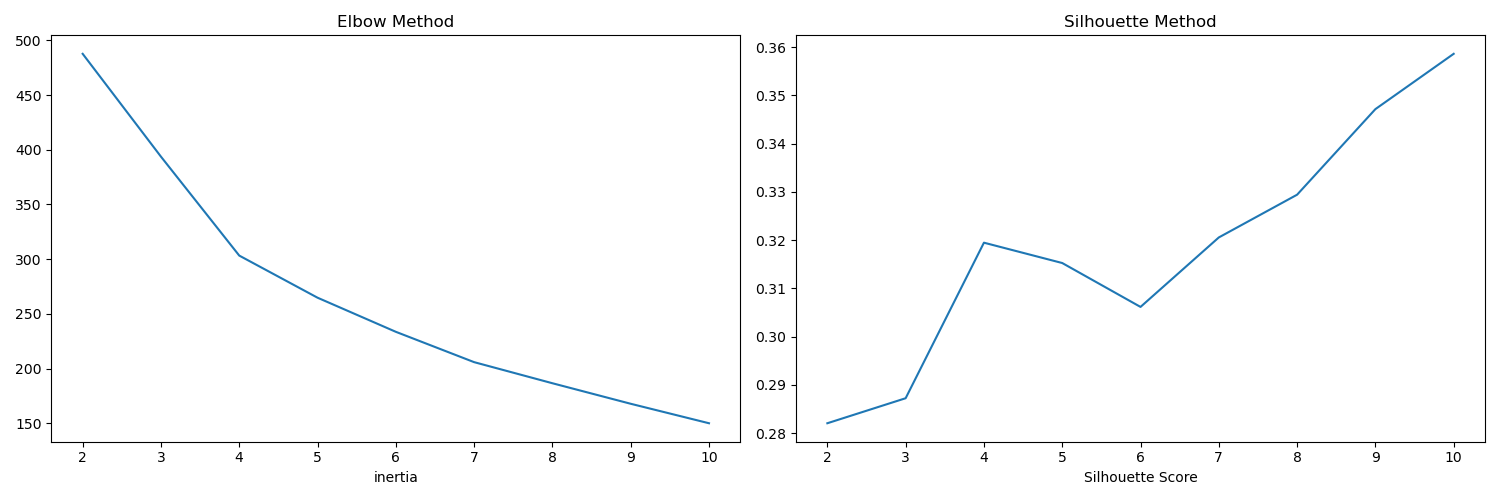

In [15]:
from funcoes_auxiliares import graficos_elbow_silhouette

graficos_elbow_silhouette(df_scaled)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("clustering", KMeans(n_clusters=5, random_state=42, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('clustering',
                 KMeans(n_clusters=5, n_init=10, random_state=42))])

In [17]:
pipeline.named_steps

{'preprocessing': ColumnTransformer(transformers=[('standard', StandardScaler(),
                                  ['Age', 'Annual Income (k$)',
                                   'Spending Score (1-100)']),
                                 ('onehot', OneHotEncoder(), ['Gender'])]),
 'clustering': KMeans(n_clusters=5, n_init=10, random_state=42)}

In [18]:
pipeline["clustering"].labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2, 1, 2, 4, 2,
       1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 4,
       1, 2, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [19]:
df_clustered = df.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


- Os graficos revelam a Distribuição dos dados em cada cluster 

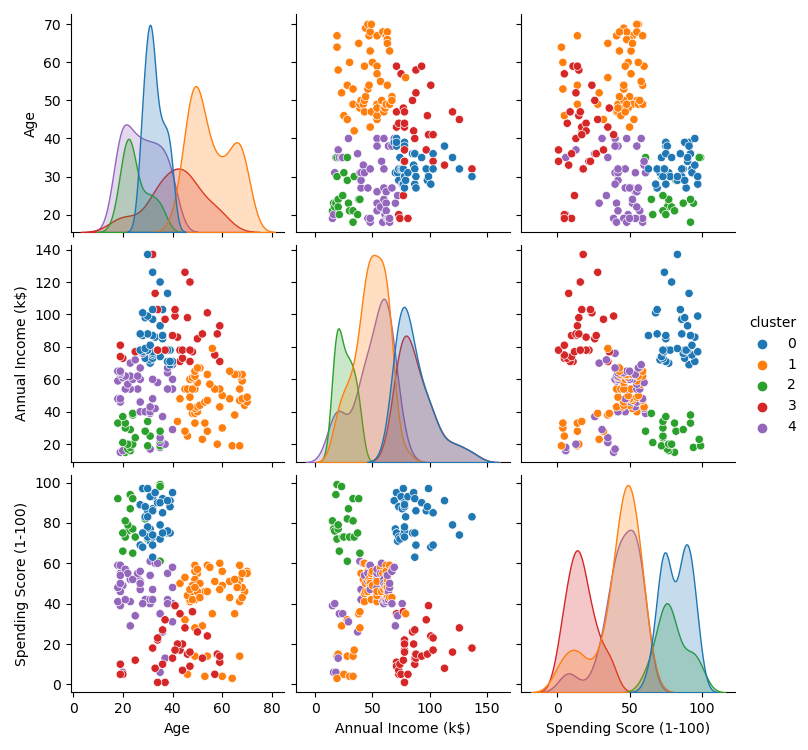

In [21]:
import seaborn as sns

sns.pairplot(df_clustered, diag_kind="kde", hue="cluster", palette="tab10");

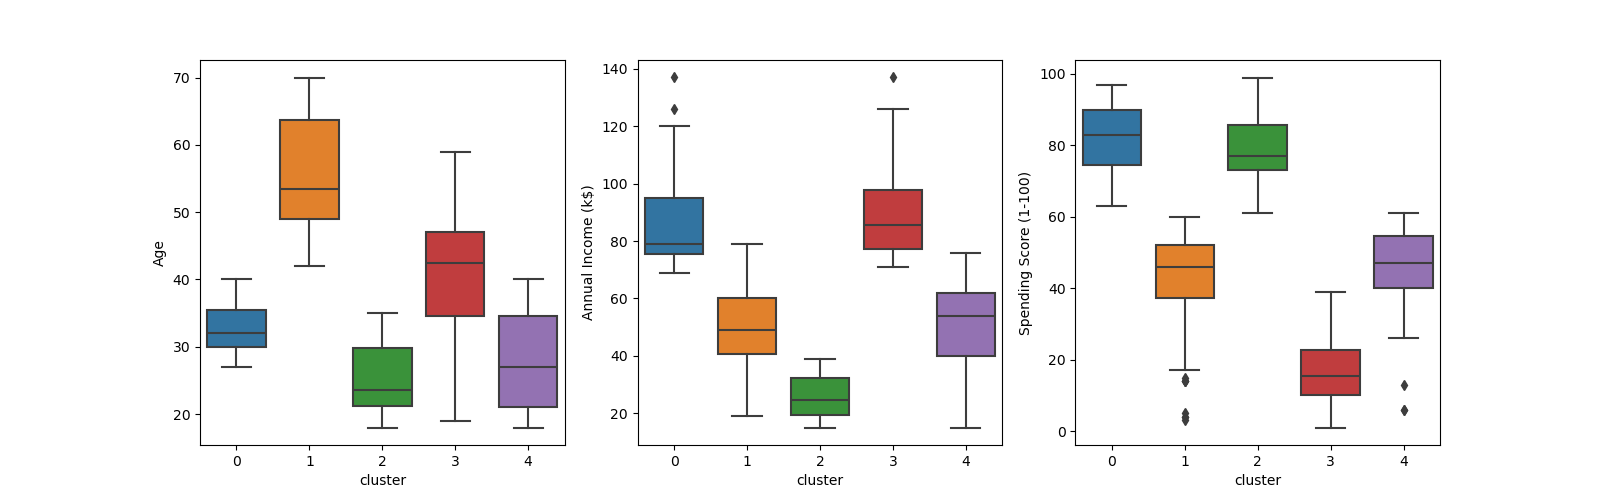

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax)
    
plt.show()

- Cluster 0 - pontuação de gastos alta, renda alta, idade jovem
- Cluster 1 - pontuação de gastos moderada, renda moderada, idade alta
- Cluster 2 - pontuação de gastos alta, renda baixa, idade jovem
- Cluster 3 - pontuação de gastos baixa, renda alta, idade moderada
- Cluster 4 - pontuação de gastos moderada, renda moderada, idade jovem

Transformando os pontos acima em uma tabela

| Pontuação de Gastos | Renda | Idade | Cluster |
|---------------------|-------|-------|---------|
| Alta                | Alta  | Jovem | 0       |
| Moderada            | Moderada | Alta | 1       |
| Alta                | Baixa | Jovem | 2       |
| Baixa               | Alta  | Moderada | 3       |
| Moderada            | Moderada | Jovem | 4       |

In [24]:
df_clustered["cluster"].value_counts().sort_index()

cluster
0    39
1    58
2    22
3    34
4    47
Name: count, dtype: int64

In [25]:
df_clustered.groupby(["cluster", "Gender"]).size()

cluster  Gender
0        Female    21
         Male      18
1        Female    33
         Male      25
2        Female    13
         Male       9
3        Female    14
         Male      20
4        Female    31
         Male      16
dtype: int64

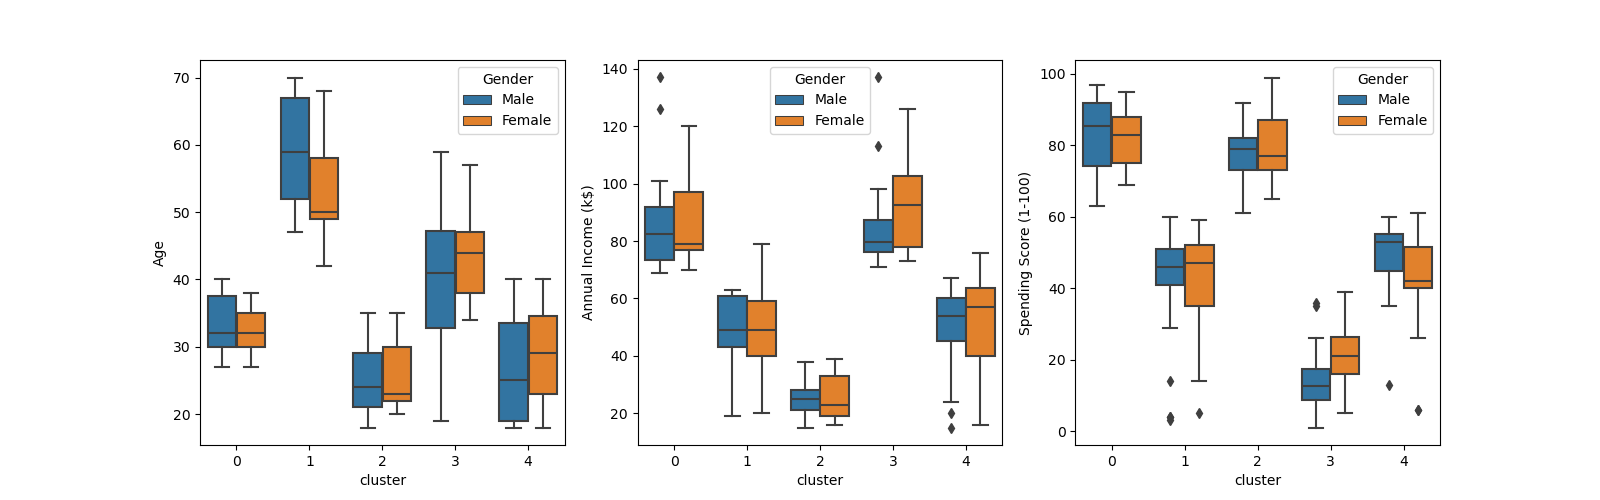

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, hue="Gender")
    
plt.show()

In [27]:
pipeline["preprocessing"].get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [28]:
pipeline["clustering"].cluster_centers_

array([[-0.44191719,  0.99158305,  1.23950275,  0.53846154,  0.46153846],
       [ 1.19862745, -0.46098141, -0.32703818,  0.56896552,  0.43103448],
       [-0.97439592, -1.32954532,  1.13217788,  0.59090909,  0.40909091],
       [ 0.17329545,  1.06645385, -1.2980103 ,  0.41176471,  0.58823529],
       [-0.78172248, -0.40306917, -0.21591396,  0.65957447,  0.34042553]])

In [29]:
pipeline["clustering"].cluster_centers_[:, :-2]

array([[-0.44191719,  0.99158305,  1.23950275],
       [ 1.19862745, -0.46098141, -0.32703818],
       [-0.97439592, -1.32954532,  1.13217788],
       [ 0.17329545,  1.06645385, -1.2980103 ],
       [-0.78172248, -0.40306917, -0.21591396]])

In [30]:
centroids = pipeline["clustering"].cluster_centers_[:, :-2]

- O ipympl é uma extensão do Matplotlib para Jupyter Notebooks que permite criar gráficos interativos. Ele possibilita zoom, rotação e outras interações diretamente no notebook, integrando-se com widgets do Jupyter para uma experiência dinâmica.
- A visualização 3d mostra os aspectos de 3 dimensões(colunas) da base de dados. Essa visualização 3d esta limitada a 3 dimensões da base, isso significa que pode haver sobreposição dos dados caso a base tenha mais de 3 colunas ou seja perda de algumas informações.

In [32]:
# !pip install ipympl

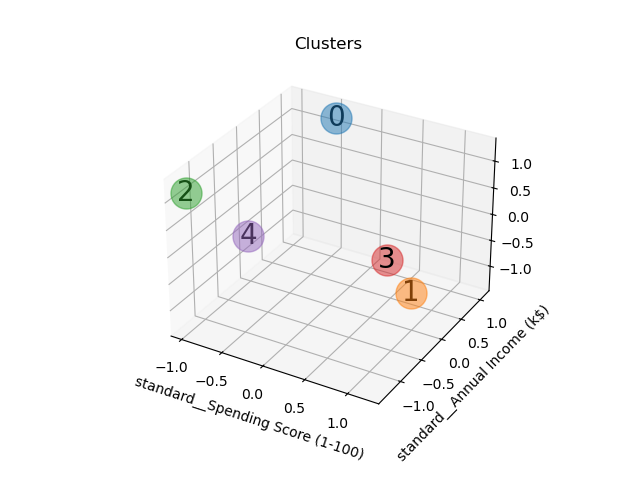

In [33]:
from funcoes_auxiliares import vizualizar_clusters
%matplotlib ipympl

vizualizar_clusters(
    df_scaled,
    ['standard__Age', 'standard__Annual Income (k$)', 'standard__Spending Score (1-100)'],
    5,
    centroids,
)

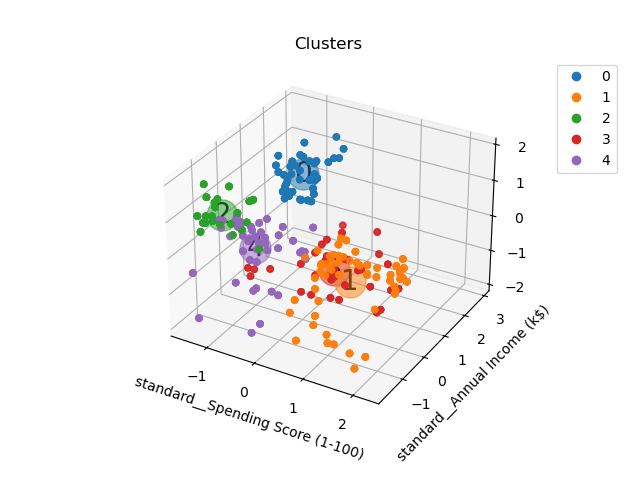

In [35]:
vizualizar_clusters(
    dataframe=df_scaled,
    colunas=['standard__Age', 'standard__Annual Income (k$)', 'standard__Spending Score (1-100)'],
    quantidade_cores=5,
    centroids=centroids,
    mostrar_pontos=True,
    coluna_clusters=df_clustered["cluster"]
)

In [36]:
df_clustered["cluster"]

0      4
1      2
2      4
3      2
4      4
      ..
195    0
196    3
197    0
198    3
199    0
Name: cluster, Length: 200, dtype: int32